In [15]:
!pip install opencv-python
!pip install pandas
!pip install tensorflow-gpu
!pip install matplotlib

<h1>Important notes</h1>
<ul>
    <li>I use python kernel 3.8.8 64-bit</li>
</ul>

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
img = cv2.imread("./train/22/1001.jpg")

print(img.shape)

(83, 83, 3)


(-0.5, 82.5, 82.5, -0.5)

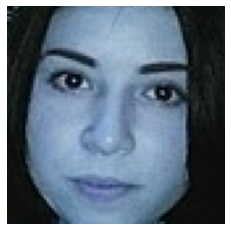

In [5]:
plt.imshow(img)
plt.axis("off")

In [2]:
img_dir = './train'
train_data = tf.keras.preprocessing.image_dataset_from_directory(img_dir,                                                                  
                                                                 label_mode = "categorical",
                                                                 image_size = (224,224),
                                                                 batch_size= 32,
                                                                 seed = 42,
                                                                 validation_split = 0.25,
                                                                 subset = "training"
                                                                 )
test_data = tf.keras.preprocessing.image_dataset_from_directory(img_dir,
                                                                label_mode = "categorical",
                                                                image_size = (224,224),
                                                                batch_size = 32,
                                                                seed = 42,
                                                                validation_split = 0.25,
                                                                subset = "validation"
                                                                )

Found 55891 files belonging to 53 classes.
Using 41919 files for training.
Found 55891 files belonging to 53 classes.
Using 13972 files for validation.


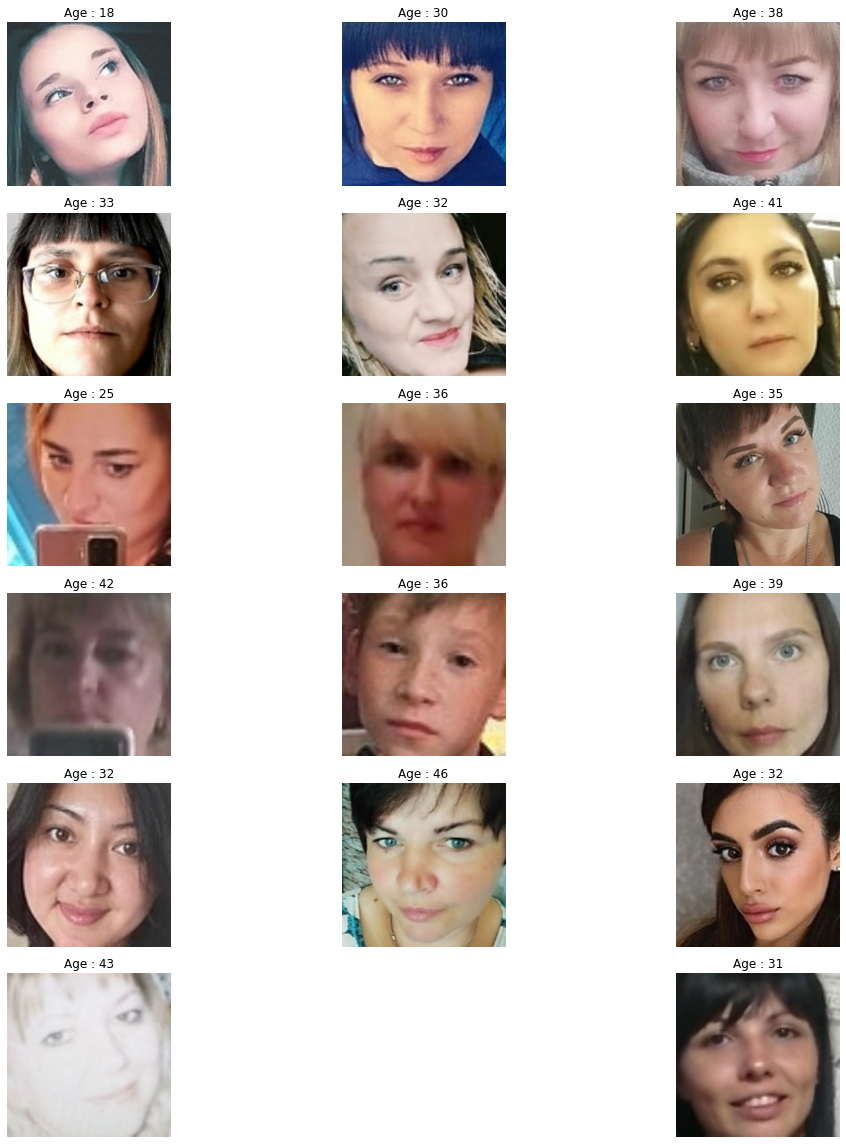

In [9]:

plt.figure(figsize=(16,16))
for image,label in train_data.take(1):
  for i in range(18):
    plt.subplot(6,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(f"Age : {train_data.class_names[tf.argmax(label[i])]}")
    plt.axis("off")
    plt.tight_layout()

In [3]:
model = tf.keras.Sequential([
    layers.Conv2D(filters = 20, kernel_size = 2,input_shape= (224,224,3),padding="same",activation= "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size= 2),
    layers.Conv2D(filters = 20, kernel_size = 2, padding= "same",activation= "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size= 2),
    layers.Conv2D(filters = 20, kernel_size= 2, padding = "same",activation= "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 20, kernel_size= 2, padding = "same",activation= "relu"),
    layers.Flatten(),
    layers.Dense(1024, activation = "relu"),                        
    layers.Dropout(0.3),
    layers.Dense(1024, activation = "relu"),                          
    layers.Dropout(0.3),
    layers.Dense(1024, activation = "relu"),
    layers.Dense(53, activation= "softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 20)      260       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 20)     80        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 20)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 20)      1620      
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 20)     80        
 hNormalization)                                                 
                                                        

In [4]:
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [5]:

if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [6]:

model.fit(
    train_data, 
    steps_per_epoch = len(train_data),      
    epochs = 10,
    validation_data = test_data,
    validation_steps = len(test_data)       
)
model.save('./results/first_run.h5')

Epoch 1/10
1310/1310 [==============================] - 533s 399ms/step - loss: 3.7087 - accuracy: 0.0442 - val_loss: 3.5879 - val_accuracy: 0.0572
Epoch 2/10
1310/1310 [==============================] - 196s 149ms/step - loss: 3.5678 - accuracy: 0.0553 - val_loss: 3.5642 - val_accuracy: 0.0598
Epoch 3/10
1310/1310 [==============================] - 194s 148ms/step - loss: 3.4867 - accuracy: 0.0627 - val_loss: 3.5575 - val_accuracy: 0.0634
Epoch 4/10
1310/1310 [==============================] - 193s 147ms/step - loss: 3.3744 - accuracy: 0.0725 - val_loss: 3.5989 - val_accuracy: 0.0617
Epoch 5/10
1310/1310 [==============================] - 195s 149ms/step - loss: 3.2235 - accuracy: 0.0878 - val_loss: 3.6561 - val_accuracy: 0.0588
Epoch 6/10
1310/1310 [==============================] - 194s 148ms/step - loss: 3.0470 - accuracy: 0.1068 - val_loss: 3.8061 - val_accuracy: 0.0542
Epoch 7/10
1310/1310 [==============================] - 194s 148ms/step - loss: 2.8669 - accuracy: 0.1421 - val_